In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the bus and station data from csv files
l_station_entries = pd.read_csv('data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')
bus_ridership = pd.read_csv('data/CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')
l_station_entries.name = 'l_station_entries'
bus_ridership.name = 'bus_ridership'
dataframes = [l_station_entries, bus_ridership]
                                
                                
# set the index to date, drop duplicates and check for missing entries
for df in dataframes:
    print('\n' + df.name)
    
    df.set_index('date', inplace=True) # set index to date
    
    # display sum of duplicates and drop them from the dataframe
    print('duplicates removed: ' + str(sum(df.duplicated())))
    df.drop_duplicates(inplace=True)
    
    # check for missing entries (fortunately, there are none for these datasets)
    mask = df.isnull()
    missing = mask.sum(axis=0)
    
    print('\nmissing: ')
    print(missing)


l_station_entries
duplicates removed: 459219

missing: 
station_id     0
stationname    0
daytype        0
rides          0
dtype: int64

bus_ridership
duplicates removed: 299345

missing: 
route      0
daytype    0
rides      0
dtype: int64


In [3]:
# remove columns that don't provide information that is useful to our analysis
l_station_entries_cl = l_station_entries.drop(['stationname', 'daytype'], axis=1)
bus_ridership_cl = bus_ridership.drop('daytype', axis=1)
clean_dfs = [l_station_entries_cl, bus_ridership_cl]

In [67]:
# group by dates to get sums for each date (this step is provided so as to decrease number of
# computations when the index is converted to a datetime object later)
bus_sum_by_date = bus_ridership_cl.groupby('date').sum()
l_sum_by_date = l_station_entries_cl.groupby('date').sum().drop('station_id', axis=1)
date_ride_sums = [bus_sum_by_date, l_sum_by_date]

# sort the data by date index and convert date to year
for df in date_ride_sums:
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    df.index = df.index.map(lambda x : x.year)

# group by dates again, now that our data is yearly
yearly_bus_sums = bus_sum_by_date.groupby('date').sum()
yearly_l_sums = l_sum_by_date.groupby('date').sum()
year_ride_sums = [yearly_bus_sums, yearly_l_sums]

yearly_bus_sums.rename(columns={"rides": "bus_rides"}, inplace=True)
yearly_l_sums.rename(columns={"rides": "l_rides"}, inplace=True)

yearly_sums = pd.concat([yearly_bus_sums, yearly_l_sums], axis=1, join='inner')

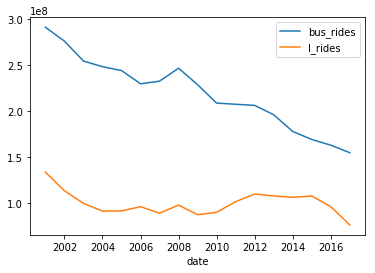

In [70]:
yearly_sums.plot()